### Module 11-1 Learning Notebook: Introduction to Classification
Classification is a big part of machine learning.<P>

Classification is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain. For example, you could predict if an incoming email is “spam” or “not spam.”  Or, given the details of a patient's diagnostic test, you could predict, "has cancer" or "doesn't have cancer".<P>
    
Unlike our past experience with regression, we are not predicting a value, but a class. It can be a binary class: 0 or 1, True or False, Died or Survived. I can also be a multi-member class: Small/Medium/Large, A/B/C/D, High risk/Medium risk/Low Risk, etc.<P>
    
Classes are sometimes called as targets, labels or categories. Classification predictive modeling is the task of approximating a mapping function from input variables (X) to discrete output variables (y).<P>
 
In this teaching notebook, we will:
1. Load and investigate the prepared Titanic dataset
2. Isolate the X and y variables
3. Split the data into training and test sets
4. Create and train a **Logistic Regression** model, a type of classification algorithm
5. Evaluate and disucss performance metrics for classification algorithms
6. Predict the likely outcome of an unsceen passenger on the Titanic

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import boto3
import pandas as pd
import numpy as np
import pickle
#from io import BytesIO

### 1. Load and investigate the data
We prepared this data in the last module. It should be all ready to go for classification.<P>

Remember:
- Gender: 0 = male, 1 = female
- HasCabin: 0 = no assigned cabin on the ship (cheap ticket), 1 = has cabin (more expensive ticket)
- C, Q, S: Dummy varibles representing the City where the passenger got on the ship
- Survivied: 0 = died, 1 = survived

In [3]:
# Setup boto3
sess = boto3.session.Session()
s3 = sess.client('s3') 
# Define the bucket & file you want to load
source_bucket = 'machinelearning-read-only'
source_key = 'data/titanic_clean.pkl'
# Get the file from S3 
response = s3.get_object(Bucket = source_bucket, Key = source_key)
#
# Read the 'Body' part of the response into a variable. This is where the DataFrame data exists in the response.
body = response['Body'].read()
#
# Create a new pandas DataFrame using the pickle.loads() function
titanic_df = pickle.loads(body)
titanic_df.head(6)

,Gender,Age,HasCabin,C,Q,S,Survived
0,0,22.000000,0,0,0,1,0
1,1,38.000000,1,1,0,0,1
2,1,26.000000,0,0,0,1,1
3,1,35.000000,1,0,0,1,1
4,0,35.000000,0,0,0,1,0
5,0,29.699118,0,0,1,0,0


In [4]:
# Verify data types and no missing values
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    889 non-null    int64  
 1   Age       889 non-null    float64
 2   HasCabin  889 non-null    int64  
 3   C         889 non-null    uint8  
 4   Q         889 non-null    uint8  
 5   S         889 non-null    uint8  
 6   Survived  889 non-null    int64  
dtypes: float64(1), int64(3), uint8(3)
memory usage: 37.3 KB


### 2. Isolate the X and y variables

In [5]:
y = titanic_df['Survived']
X = titanic_df.drop(['Survived'], axis = 1)

### 3. Split the data into training and test sets

In [6]:
# Split into train/test
# Reserve 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# Verify the sizes of the split datasets
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (711, 6)
y_train: (711,)
X_test: (178, 6)
y_test: (178,)


### 4. Create and train a Logistic Regression model

Logistic Regression can be used for various classification problems such as spam detection, diabetes prediction, if a given customer will purchase a particular product or will they churn another competitor, whether the user will click on a given advertisement link or not.<P>

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem. Its basic fundamental concepts are also constructive in deep learning. Logistic regression describes and estimates the relationship between one dependent binary variable and a set of independent variables.<P>
    
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    
<img src="images/LR2.png" alt="LR2" style="width: 600px;"/>

In [7]:
# Create model with default hyperparameters
lr = LogisticRegression()
# Train the model
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Let's discuss Logisitic Regression hyperparameters:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

C hyperparameter, called regularization. Remember our discussion of overfitting vs underfitting? Overfitting means model is very focused on the training data and may not be good for unseen data. Underfitting means the model is too general and may have high error.<P>

You can control underfitting/overfitting using the C parameter in logistic regression.

- Default value of C = 1.0: A good place to start. C must be a positive float number
- Low value of C: high regulation (move away from overfitting)
- High value of C: low regularization (pay more attention to fitting the training data
    
A good next step might be to tune C, but we won't do that now.

### 5. Evaluate and disucss performance metrics for classification algorithms

Recall from our regression experience, we often use some form of the sqaure of the error from the prediction to the model. We calculated MSE, which then led to the calculation of the Coefficient of Determination, R^2.<P>
 
Evaluation of the performance of classification models is different. **MSE and R^2 no longer apply.**<P>
    
A common metric for classification is **accuracy**: the fraction of predictions the model got right. <P>
   
Remember, we calculate this metric by predicting classes on the X_test set, then comparing those to the actual classes that exist in y_test.

In [8]:
# Predict using the trained model and X_test data
y_pred = lr.predict(X_test)
# Show the first 4 from predicted/actual
print('Predicted survivial:', y_pred[0:4]) # Show a few of the predicted classes
print('Actual survival:', list(y_test[0:4])) # Show a few of the actual classes

Predicted survivial: [0 0 1 0]
Actual survival: [0, 0, 0, 0]


In [9]:
# New performance metric: Accuracy
# To get the accuracy, call the score() function on the trained model
acc = lr.score(X_test, y_test) # Number predicted correctly divided by total in data set
print('Our model accuracy:', acc)

Our model accuracy: 0.8033707865168539


In [10]:
# Let's display the confusion matrix, then discuss it.
#   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
confusion_matrix(y_test, y_pred)

array([[89, 15],
       [20, 54]])

Another way to look at the model performance is to use the "confusion matrix". This displays both the correct and incorrect predictions in a simple table.<P>
<img src="images/confusion_matrix.jpeg" alt="Confusion Matrix" style="width: 400px;"/>

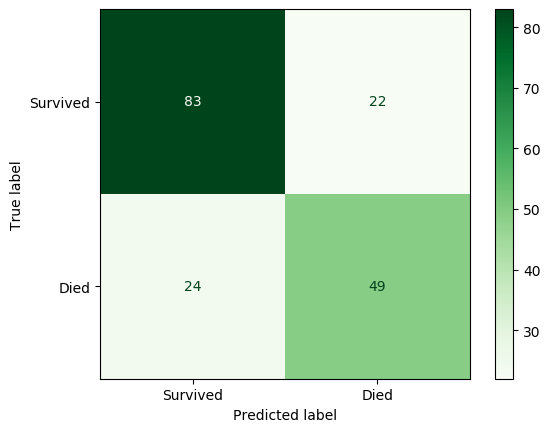

In [10]:
# There is also an easy way for us to plot the confusion matrix.
#   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
plot_confusion_matrix(lr, X_test, y_test,cmap = 'Greens',display_labels=['Survived','Died'],values_format = '')
plt.show()

There is a lot more to performance evaluation in classification, but we'll save it for later.

### 6. Predict the likely outcome of an unsceen passenger on the Titanic

Just as with prediction, we can use the trained model to predict the outcome of a new data point.

In [11]:
# Predict new values
# Recall the column names
print(list(X.columns))
# Define a new passenger
p = [1.0, 28.0, 1.0, 0.0, 0.0, 1.0]
# For ease and consistency, convert to a pandas Dataframe
p_df = pd.DataFrame(data = p )
# Use the trained model to predict outcome of this passenger
pred = lr.predict(p_df.T).item() # We have to use the pandas transpose to get the data in the right shape.
if pred == 1:
    print('Predicted to Survive:', pred)
else:
    print('Predicted to Die:', pred)

['Gender', 'Age', 'HasCabin', 'C', 'Q', 'S']
Predicted to Survive: 1


That's it, we are now doing classification.